## Realimentación de estados tipo SERVO
  by: Sergio Andres Castaño Giraldo
  
  Rio de Janeiro - 2020
  
  https://controlautomaticoeducacion.com/sistemas-dinamicos-lineales
______________________________________________________________________

In [1]:
from scipy import signal
import scipy.linalg as la
import matplotlib.pyplot as plt
import numpy as np

# install control 
# https://python-control.readthedocs.io/en/latest/intro.html
try:
    from control.matlab import *
except:
    !pip install slycot   
    !pip install control
    #conda install -c conda-forge control
    # restart kernel if this doesn't import
    from control.matlab import *

# Suponga que tenemos el siguiente sistema que NO está en la FCC:

$\dot{\vec{x}}=\begin{bmatrix}
0& 1 & 0 & 0\\
0 & 0 & -1 &0 \\
0 & 0 & 0 &1 \\
0 & 0 & 5 &0
\end{bmatrix}\vec{x}+\begin{bmatrix}0\\1\\0\\-2\end{bmatrix}u(t)$

$y(s)=\begin{bmatrix}1 & 0 & 0&0 \end{bmatrix}\vec{x}$


In [4]:
# Sistema
a = np.array([[0,1,0,0],[0,0,-1,0],[0,0,0,1],[0,0,5,0]]);
b = np.array([[0],[1],[0],[-2]]);
c = np.array([1, 0, 0, 0]);
d = 0;

#Sistema en Espacio de Estados
sys=ss(a,b,c,d);
#sys = signal.StateSpace(A,b,c,0);
#sys = StateSpace(A,b,c,0);

#Controlabilidad
Co = ctrb(a,b)
#Rango de la matriz de controlabilidad
print('El rango de la matriz Co= ', np.linalg.matrix_rank(Co))

El rango de la matriz Co=  4


# Sistema aumentado: Planta + Controlador

$\begin{bmatrix}\dot{\mathbf{x}}(t)\\\dot{\mathbf{\xi}}(t)\end{bmatrix}=\begin{bmatrix}
\mathbf{A}& 0 \\
\mathbf{-C} & \mathbf{0}
\end{bmatrix}
\begin{bmatrix}{\mathbf{x}}(t)\\{\mathbf{\xi}}(t)\end{bmatrix}
+\begin{bmatrix}\mathbf{B}\\\mathbf{0}\end{bmatrix}\mathbf{u}(t)+
\begin{bmatrix}\mathbf{0}\\\mathbf{I} \end{bmatrix}\mathbf{r}(t)$


In [88]:
Za = np.zeros((len(a),1)); #Vector de ceros
Ca = np.append(c,0);
Aa = np.hstack((a,Za));
Aa = np.vstack((Aa,-Ca));
Ba = np.append([b],[0])[np.newaxis];
Ba = np.transpose(Ba);
Ea = np.append([Za],[1])[np.newaxis];
Ea = np.transpose(Ea);
#sys_a =ss(Aa,np.hstack([Ba, Ea]),Ca,0)

A = [[ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  5.  0.]]

B = [[ 0.  0.]
 [ 1.  0.]
 [ 0.  0.]
 [-2.  0.]]

C = [[1. 0. 0. 0.]]

D = [[0. 0.]]



# Realimentación de Estados

In [60]:
# Polos deseados sin integrador
polos = np.roots(np.convolve([1,5],[1, 5, 10.5, 11, 5]));

In [78]:
K = place(Aa,Ba,polos)
print('[K1, k2]: ',K)

[K1, k2]:  [[-20.         -23.94444444 -30.25       -16.97222222   8.33333333]]


# Lazo cerrado

In [79]:
Af=Aa-Ba*K
Ef = la.eig(Af);
print(Ef[0])

[-5. +0.j  -1.5+0.5j -1.5-0.5j -1. +1.j  -1. -1.j ]


In [90]:
sys_f=ss(Af,Ea,Ca,0)
print(sys_f)

A = [[  0.           1.           0.           0.           0.        ]
 [ 20.          23.94444444  29.25        16.97222222  -8.33333333]
 [  0.           0.           0.           1.           0.        ]
 [-40.         -47.88888889 -55.5        -33.94444444  16.66666667]
 [ -1.           0.           0.           0.           0.        ]]

B = [[0.]
 [0.]
 [0.]
 [0.]
 [1.]]

C = [[1. 0. 0. 0. 0.]]

D = [[0.]]



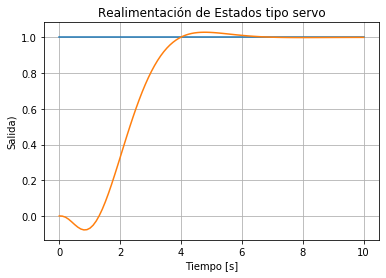

In [93]:
#Respuesta del sistema
ts = linspace(0,10,100);
r = np.ones(100);
yi, t = step(sys_f, ts)
plt.figure(1)
plt.plot(t,r,t,yi)
plt.title('Realimentación de Estados tipo servo');
plt.xlabel('Tiempo [s]')
plt.ylabel('Salida)')
plt.grid(True)